# Text to Visualization with LLM

## Setting
 - Auto Reload
 - path for utils

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
module_path = "../.."
sys.path.append(os.path.abspath(module_path))

## 1. Create Bedrock client

In [3]:
import json
import boto3
from pprint import pprint
from termcolor import colored
from utils import bedrock, print_ww
from utils.bedrock import bedrock_info

### ---- ⚠️ Un-comment and edit the below lines as needed for your AWS setup ⚠️ ----
- os.environ["AWS_DEFAULT_REGION"] = "<REGION_NAME>"  # E.g. "us-east-1"
- os.environ["AWS_PROFILE"] = "<YOUR_PROFILE>"
- os.environ["BEDROCK_ASSUME_ROLE"] = "<YOUR_ROLE_ARN>"  # E.g. "arn:aws:..."
- os.environ["BEDROCK_ENDPOINT_URL"] = "<YOUR_ENDPOINT_URL>"  # E.g. "https://..."

In [4]:
boto3_bedrock = bedrock.get_bedrock_client(
    assumed_role=os.environ.get("BEDROCK_ASSUME_ROLE", None),
    endpoint_url=os.environ.get("BEDROCK_ENDPOINT_URL", None),
    region=os.environ.get("AWS_DEFAULT_REGION", None),
)

print (colored("\n== FM lists ==", "green"))
pprint (bedrock_info.get_list_fm_models(verbose=False))

Create new client
  Using region: None
  Using profile: None
boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-east-1.amazonaws.com)

== FM lists ==
{'Claude-Instant-V1': 'anthropic.claude-instant-v1',
 'Claude-V1': 'anthropic.claude-v1',
 'Claude-V2': 'anthropic.claude-v2',
 'Claude-V2-1': 'anthropic.claude-v2:1',
 'Claude-V3-Haiku': 'anthropic.claude-3-haiku-20240307-v1:0',
 'Claude-V3-Sonnet': 'anthropic.claude-3-sonnet-20240229-v1:0',
 'Cohere-Embeddings-En': 'cohere.embed-english-v3',
 'Cohere-Embeddings-Multilingual': 'cohere.embed-multilingual-v3',
 'Command': 'cohere.command-text-v14',
 'Command-Light': 'cohere.command-light-text-v14',
 'Jurassic-2-Mid': 'ai21.j2-mid-v1',
 'Jurassic-2-Ultra': 'ai21.j2-ultra-v1',
 'Llama2-13b-Chat': 'meta.llama2-13b-chat-v1',
 'Titan-Embeddings-G1': 'amazon.titan-embed-text-v1',
 'Titan-Text-Embeddings-V2': 'amazon.titan-embed-text-v2:0',
 'Titan-Text-G1': 'amazon.titan-text-express-v1',
 'Titan-Text-G1-Expres

## 2. Claude-v3-sonnet 모델 로딩

In [5]:
from langchain_aws import ChatBedrock
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

In [6]:
llm_text = ChatBedrock(
    model_id=bedrock_info.get_model_id(model_name="Claude-V3-Sonnet"),
    client=boto3_bedrock,
    streaming=True,
    callbacks=[StreamingStdOutCallbackHandler()],
    model_kwargs={
        "max_tokens": 1024,
        "stop_sequences": ["\n\nHuman"],
        # "temperature": 0,
        # "top_k": 350,
        # "top_p": 0.999
    }
)
llm_text

ChatBedrock(callbacks=[<langchain_core.callbacks.streaming_stdout.StreamingStdOutCallbackHandler object at 0x7f7b240c4310>], client=<botocore.client.BedrockRuntime object at 0x7f7b2fb091e0>, model_id='anthropic.claude-3-sonnet-20240229-v1:0', model_kwargs={'max_tokens': 1024, 'stop_sequences': ['\n\nHuman']}, streaming=True)

## 3. Data loading

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("./data/train_sample.csv", index_col=0)

In [9]:
df.describe()

,cont_line_seq,thinq_entr,breakdown_b0617,survey_ans_count,survey_service_avg_score,call_a070621,survey_nps_avg_score,survey_service_min_score,call_a050101,water_d0065,...,age_nm,rental_usage_days,call_a040101,visit_time_diff_max,customer_price,careship_total_contract,call_a070614,obs_water_plp,as_water_survey_avg,time
count,1.000000e+02,100.00000,100.000000,100.000000,43.000000,100.0,19.000000,43.000000,100.00000,100.0,...,99.000000,100.00000,100.000000,100.000000,8.900000e+01,100.000000,100.00,100.000000,17.000000,1.000000e+02
mean,1.426837e+07,0.21000,0.020000,1.120000,4.719380,0.0,4.912281,4.441860,0.25000,0.0,...,49.161616,1135.95000,0.370000,43.940000,1.598517e+06,0.110000,0.01,0.210000,9.745938,1.686882e+09
std,5.578827e+05,0.40936,0.140705,1.736594,0.381586,0.0,2.788517,0.733625,0.51981,0.0,...,10.701618,74.99473,1.307747,18.915453,2.640471e+05,0.447101,0.10,1.558911,0.325586,0.000000e+00
min,1.229081e+07,0.00000,0.000000,0.000000,3.600000,0.0,3.000000,1.000000,0.00000,0.0,...,32.000000,1006.00000,0.000000,21.000000,1.075022e+06,0.000000,0.00,0.000000,9.000000,1.686882e+09
25%,1.415657e+07,0.00000,0.000000,0.000000,4.500000,0.0,3.000000,4.000000,0.00000,0.0,...,42.000000,1077.00000,0.000000,33.750000,1.409684e+06,0.000000,0.00,0.000000,9.500000,1.686882e+09
50%,1.431828e+07,0.00000,0.000000,0.000000,5.000000,0.0,3.000000,5.000000,0.00000,0.0,...,46.000000,1152.00000,0.000000,40.000000,1.578893e+06,0.000000,0.00,0.000000,10.000000,1.686882e+09
75%,1.459880e+07,0.00000,0.000000,2.000000,5.000000,0.0,6.166667,5.000000,0.00000,0.0,...,55.000000,1193.00000,0.000000,47.250000,1.713002e+06,0.000000,0.00,0.000000,10.000000,1.686882e+09
max,1.494462e+07,1.00000,1.000000,7.000000,5.000000,0.0,10.000000,5.000000,2.00000,0.0,...,85.000000,1248.00000,11.000000,155.000000,2.214996e+06,3.000000,1.00,14.000000,10.000000,1.686882e+09


In [11]:
df.head()

,cont_line_seq,churn_yn,thinq_entr,breakdown_b0617,funtion,survey_ans_count,survey_service_avg_score,rental_sales_channel,call_a070621,survey_nps_avg_score,...,visit_time_diff_max,customer_price,careship_total_contract,call_a070614,obs_water_plp,contract_user_yn,rental_mktg_agree_yn,gender_nm,as_water_survey_avg,time
0,14025423,N,1,0,온수/냉수/정수,3,4.333333,하이프라자(H),0,NaN,...,42.0,1771684.0,0,0,0,Y,Y,여자,NaN,1686882135
1,12767520,Y,0,0,온수/냉수/정수,0,NaN,온라인케어솔루션전문점,0,NaN,...,31.0,1520682.0,0,0,0,Y,N,여자,NaN,1686882135
2,14044817,N,0,0,냉수/정수,6,4.666667,온라인케어솔루션전문점,0,3.0,...,35.0,NaN,0,0,0,Y,N,남자,NaN,1686882135
3,14372633,N,0,0,온수/냉수/정수,3,4.666667,온라인케어솔루션전문점,0,3.0,...,41.0,NaN,0,0,0,Y,N,남자,NaN,1686882135
4,14143155,N,0,0,온수/냉수/정수,2,5.000000,온라인케어솔루션전문점,0,NaN,...,36.0,1692663.0,0,0,0,Y,N,여자,NaN,1686882135


## 4. Text to Visualization

In [12]:
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_ENDPOINT"]="https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"]="your key"
os.environ["LANGCHAIN_PROJECT"]="text2chart"

In [55]:
from utils.text_to_report import prompt_repo, text2chart_chain
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate, MessagesPlaceholder

In [56]:
system_prompt = prompt_repo.get_system_prompt(role="text2chart")
system_message_template = SystemMessagePromptTemplate.from_template(system_prompt)

t2c = text2chart_chain(
    llm_text=llm_text,
    system_prompt=system_prompt,
    num_rows=5,
    parsing_pattern=r'<update_code>(.*?)</update_code>',
    verbose=False
)

"thinq_entr 컬럼의 각각 값에 대한 survey_service_avg_score 컬럼의 분포 그려줘" <BR>
"churn_yn 여부에 따른 rental_sales_channel 구성 비율을 파이차트로 그려줘"

<update_code>
import pandas as pd
import matplotlib.pyplot as plt

churn_yn_groups = df.groupby('churn_yn')['rental_sales_channel'].value_counts(normalize=True).unstack('churn_yn')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, (group_name, group_data) in enumerate(churn_yn_groups.items()):
    group_data.plot.pie(ax=axs[i], autopct='%.2f%%')
    axs[i].set_title(f'churn_yn = {group_name}')

fig.tight_layout()
fig.savefig('results.png', bbox_inches='tight')

result = {'type': 'image', 'value': 'results.png'}
</update_code>

설명:
1. `churn_yn` 그룹별로 `rental_sales_channel`의 값 비율을 계산합니다.
2. 두 개의 서브플롯을 생성하여 각 `churn_yn` 그룹에 대한 파이차트를 그립니다.
3. 각 파이차트의 제목에는 `churn_yn` 값이 표시됩니다.
4. 결과 이미지를 `results.png`로 저장합니다.
5. 결과 딕셔너리를 반환합니다.

이 코드는 `churn_yn` 값(Y/N)에 따라 두 개의 파이차트를 생성하여 각 그룹 내에서 `rental_sales_channel`의 비율을 시각화합니다.

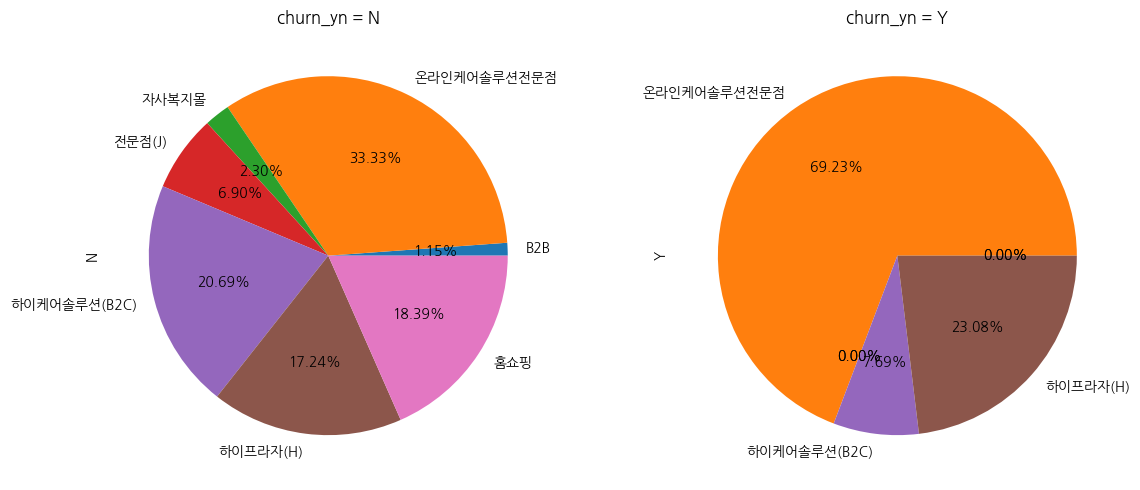

In [64]:
response = t2c.query(
    df=df,
    query="churn_yn 여부에 따른 rental_sales_channel 구성 비율을 각각 파이차트로 그려줘",
    verbose=False,
    show_chart=True
)

''

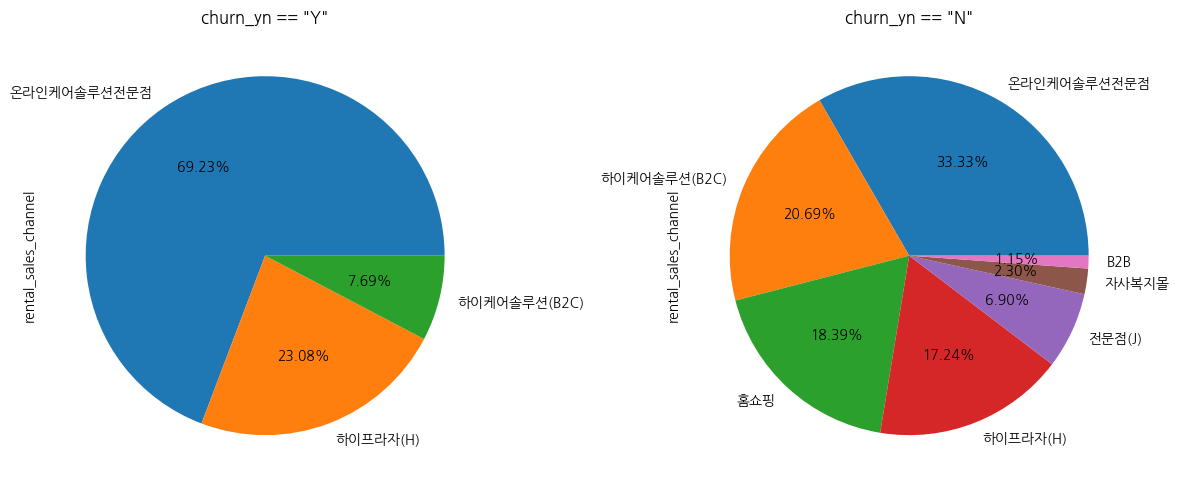

In [63]:
t2c.code_execution(
    df=df,
    response=response
)

### Matplotlib for Korean
 - https://seong6496.tistory.com/95 참고
#### font download

In [ ]:
!curl -o nanumfont.zip http://cdn.naver.com/naver/NanumFont/fontfiles/NanumFont_TTF_ALL.zip 
!sudo fc-cache -f -v
!sudo unzip -d /usr/share/fonts/nanum nanumfont.zip
!fc-list | grep -i nanum

In [ ]:
!cp /usr/share/fonts/nanum/* /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumGothic')
print(plt.rcParams['font.family'])